58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


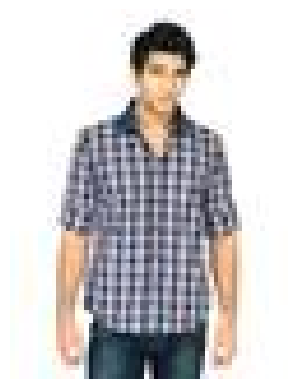

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature shape: (1, 7, 7, 512)


In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "styles_1000.csv"  # Update with your actual CSV path
df = pd.read_csv(csv_path)

# Define image directory
image_dir = "images"  # Update with actual image folder path

# Load the VGG16 model (pretrained on ImageNet)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Function to process images
def process_image(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Load image & resize
    img_array = img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Normalize for VGG16
    return img_array

# Testing with one image
sample_img_path = os.path.join(image_dir, str(df.iloc[0]["id"]) + ".jpg")  # Pick first image
img_array = process_image(sample_img_path)

# Show image
plt.imshow(load_img(sample_img_path))
plt.axis("off")
plt.show()

# Extract features using VGG16
features = base_model.predict(img_array)
print("Feature shape:", features.shape)  # Should be (1, 7, 7, 512)


In [6]:
# Dictionary to store extracted features
features_dict = {}

# Loop through all images in the dataset
for index, row in df.iterrows():
    img_id = str(row["id"]) + ".jpg"  # Get image filename
    img_path = os.path.join(image_dir, img_id)  

    # Check if image exists
    if os.path.exists(img_path):
        img_array = process_image(img_path)  # Preprocess image
        features = base_model.predict(img_array)  # Extract features
        features_dict[row["id"]] = features.flatten()  # Flatten & store
    else:
        print(f"Image {img_id} not found!")

# Convert dictionary to DataFrame
features_df = pd.DataFrame.from_dict(features_dict, orient="index")

# Save features to a CSV file
features_df.to_csv("image_features.csv")

print("✅ Feature extraction complete! Features saved to 'image_features.csv'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load extracted features
features_df = pd.read_csv("image_features.csv", index_col=0)

# Check feature shape
print(features_df.shape)  # Should be (num_images, feature_size)
print(features_df.head())  # Show first few rows


(958, 25088)
         0    1    2    3    4    5    6    7    8    9  ...  25078  25079  \
15970 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
39386 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
59263 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
21379 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
53759 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   

       25080  25081  25082  25083  25084  25085  25086  25087  
15970   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
39386   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
59263   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
21379   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
53759   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  

[5 rows x 25088 columns]


In [8]:
def find_similar_clothes(image_id, top_n=5):
    # Get feature vector of selected image
    selected_features = features_df.loc[image_id].values.reshape(1, -1)

    # Compute similarity with all images
    similarity_scores = cosine_similarity(selected_features, features_df.values)

    # Get top N similar items (excluding the selected one)
    similar_indices = similarity_scores.argsort()[0][-top_n-1:-1][::-1]
    
    # Get matching item IDs
    similar_items = features_df.iloc[similar_indices].index.tolist()

    return similar_items

# Example: Find 5 most similar clothes for a random item
example_id = features_df.index[10]  # Pick a random item from dataset
similar_items = find_similar_clothes(example_id)

print(f"Items similar to {example_id}: {similar_items}")


Items similar to 9204: [9203, 23849, 41861, 20856, 12994]


In [11]:
df = pd.read_csv("styles_1000.csv")
print(df.columns)  # List all column names



Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [12]:
print(df["masterCategory"].unique())  # Check main categories
print(df["subCategory"].unique())  # Check subcategories


['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items']
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery' 'Lips' 'Saree'
 'Eyewear' 'Nails' 'Scarves' 'Dress' 'Loungewear and Nightwear' 'Wallets'
 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup' 'Free Gifts'
 'Ties' 'Accessories' 'Skin']


In [13]:
def get_matching_items(item_id, top_n=5):
    # Get selected item's details
    item_details = df[df["id"] == item_id].iloc[0]
    item_category = item_details["subCategory"]
    item_color = item_details["baseColour"]

    # Define matching rules
    if item_category in ["Topwear", "Dress", "Saree"]:
        matching_categories = ["Bottomwear", "Bags", "Jewellery", "Footwear"]
    elif item_category in ["Bottomwear"]:
        matching_categories = ["Topwear", "Footwear", "Accessories"]
    else:
        matching_categories = ["Accessories", "Footwear"]

    # Filter dataset for matching categories
    matching_items = df[df["subCategory"].isin(matching_categories)]

    # Filter by color compatibility
    matching_items = matching_items[matching_items["baseColour"] == item_color]

    # Get top N matching items
    matching_item_ids = matching_items["id"].sample(min(top_n, len(matching_items))).tolist()

    return matching_item_ids

# Example: Find matching items for a selected top (replace with any valid ID)
example_top_id = df[df["subCategory"] == "Topwear"]["id"].iloc[0]
matching_items = get_matching_items(example_top_id)

print(f"Matching items for {example_top_id}: {matching_items}")


Matching items for 15970: [23072, 17624, 40371, 34204]


In [17]:
print(df[df["id"] == 15970])  # Replace 15970 with the ID you're testing


def get_matching_items(item_id, top_n=5):
    item_details = df[df["id"] == item_id]
    if item_details.empty:
        print("Item ID not found!")
        return []
    
    item_details = item_details.iloc[0]
    item_category = item_details["subCategory"]
    item_color = get_similar_color(item_details["baseColour"])
    item_color_group = get_color_group(item_color)
    item_gender = item_details["gender"]

    # Filter dataset by same gender
    gender_filtered_df = df[df["gender"] == item_gender]
    print(f"Filtering items for gender: {item_gender} → Found {len(gender_filtered_df)} items.")

    if item_category == "Topwear":
        matching_categories = ["Bottomwear", "Bags", "Jewellery", "Footwear"]
        matching_items = gender_filtered_df[gender_filtered_df["subCategory"].isin(matching_categories)].copy()
        print(f"Matching categories: {matching_categories} → Found {len(matching_items)} items.")

        matching_items["colorGroup"] = matching_items["baseColour"].apply(get_color_group)
        bottomwear_items = matching_items[(matching_items["subCategory"] == "Bottomwear")]

        print(f"Bottomwear items before color filtering: {len(bottomwear_items)}")

        if item_color_group == "light":
            bottomwear_items = bottomwear_items[bottomwear_items["colorGroup"] == "dark"]
        elif item_color_group == "dark":
            bottomwear_items = bottomwear_items[bottomwear_items["colorGroup"] == "light"]

        print(f"Bottomwear items after color filtering: {len(bottomwear_items)}")

        chosen_bottomwear = bottomwear_items.sample(1) if not bottomwear_items.empty else None
        bottomwear_color = get_similar_color(chosen_bottomwear["baseColour"].values[0]) if chosen_bottomwear is not None else item_color

        accessory_items = matching_items[(matching_items["subCategory"].isin(["Bags", "Jewellery", "Footwear"]))]
        accessory_items = accessory_items[
            (accessory_items["baseColour"].apply(get_similar_color) == item_color) | 
            (accessory_items["baseColour"].apply(get_similar_color) == bottomwear_color)
        ]

        print(f"Accessory items after color filtering: {len(accessory_items)}")

        chosen_accessories = accessory_items.sample(min(3, len(accessory_items))) if not accessory_items.empty else None

        result = []
        if chosen_bottomwear is not None:
            result.append(int(chosen_bottomwear["id"].values[0]))
        if chosen_accessories is not None:
            result.extend(chosen_accessories["id"].tolist())

        print(f"Final recommended items: {result}")
        return result

    return []


      id gender masterCategory subCategory articleType baseColour season  \
0  15970    Men        Apparel     Topwear      Shirts  Navy Blue   Fall   

     year   usage                productDisplayName  
0  2011.0  Casual  Turtle Check Men Navy Blue Shirt  


In [18]:
print(df[(df["gender"] == "Men") & (df["subCategory"] == "Bottomwear")])


        id gender masterCategory subCategory  articleType baseColour  season  \
1    39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
3    21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
45   18005    Men        Apparel  Bottomwear       Shorts      Black  Summer   
65   54924    Men        Apparel  Bottomwear       Shorts       Blue  Summer   
157  10257    Men        Apparel  Bottomwear     Trousers      Black    Fall   
202  17624    Men        Apparel  Bottomwear  Track Pants  Navy Blue    Fall   
206  13284    Men        Apparel  Bottomwear       Shorts      Black    Fall   
209  26163    Men        Apparel  Bottomwear     Trousers       Grey  Summer   
312  34204    Men        Apparel  Bottomwear  Track Pants  Navy Blue    Fall   
322  16508    Men        Apparel  Bottomwear        Jeans       Blue    Fall   
346  13248    Men        Apparel  Bottomwear     Trousers      Brown    Fall   
383  11349    Men        Apparel  Bottom

In [19]:
df["colorGroup"] = df["baseColour"].apply(get_color_group)  
print(df[(df["gender"] == "Men") & (df["subCategory"] == "Bottomwear")]["colorGroup"].value_counts())


colorGroup
dark       15
neutral    11
light       3
Name: count, dtype: int64


In [20]:
print(get_color_group("Navy Blue"))


neutral


In [21]:
def get_color_group(color):
    dark_colors = {"Black", "Navy Blue", "Maroon", "Dark Green", "Brown", "Charcoal", "Dark Grey"}
    light_colors = {"White", "Beige", "Cream", "Light Grey", "Yellow", "Pink"}

    if color in dark_colors:
        return "dark"
    elif color in light_colors:
        return "light"
    else:
        return "neutral"  # Fallback for colors we haven't classified yet

df["colorGroup"] = df["baseColour"].apply(get_color_group)


In [22]:
print(get_color_group("Navy Blue"))


dark


In [23]:
print(df["colorGroup"].value_counts())


colorGroup
neutral    383
dark       366
light      209
Name: count, dtype: int64


In [25]:
print(df[df["colorGroup"] == "neutral"]["baseColour"].unique())


['Blue' 'Silver' 'Grey' 'Green' 'Purple' 'Bronze' 'Teal' 'Copper'
 'Off White' 'Red' 'Khaki' 'Orange' 'Coffee Brown' 'Gold' 'Steel' 'Tan'
 'Magenta' 'Lavender' 'Sea Green' 'Peach' 'Olive' 'Skin' 'Burgundy' 'Rust'
 'Multi' 'Grey Melange' 'Lime Green' 'Mauve' 'Turquoise Blue']


In [26]:
def get_color_group(color):
    dark_colors = {
        "Black", "Navy Blue", "Maroon", "Dark Green", "Brown", "Charcoal", "Dark Grey",
        "Olive", "Burgundy", "Mustard", "Blue", "Grey", "Green", "Purple", "Bronze",
        "Teal", "Copper", "Khaki", "Coffee Brown", "Rust", "Mauve"
    }
    
    light_colors = {
        "White", "Beige", "Cream", "Light Grey", "Yellow", "Pink", "Sky Blue", "Peach",
        "Silver", "Off White", "Lavender", "Steel", "Tan", "Magenta", "Sea Green",
        "Skin", "Turquoise Blue", "Lime Green"
    }

    if color in dark_colors:
        return "dark"
    elif color in light_colors:
        return "light"
    else:
        return "neutral"  # Red, Orange, Gold, Multi, etc.

df["colorGroup"] = df["baseColour"].apply(get_color_group)


In [27]:
print(df[df["colorGroup"] == "neutral"]["baseColour"].unique())


['Red' 'Orange' 'Gold' 'Multi' 'Grey Melange']


In [33]:
print(df["colorGroup"].value_counts())


colorGroup
dark       612
light      269
neutral     77
Name: count, dtype: int64


In [34]:
print(df[df["id"] == 15970])


      id gender masterCategory subCategory articleType baseColour season  \
0  15970    Men        Apparel     Topwear      Shirts  Navy Blue   Fall   

     year   usage                productDisplayName colorGroup  
0  2011.0  Casual  Turtle Check Men Navy Blue Shirt       dark  


In [36]:
def find_matching_items(item_id):
    # Get selected item details
    item = df[df["id"] == item_id]
    if item.empty:
        return []

    item_color = item["colorGroup"].values[0]
    item_category = item["subCategory"].values[0]
    item_gender = item["gender"].values[0]

    matching_items = []

    # 1️⃣ Find bottomwear with opposite color group (dark/light pairing)
    if item_category == "Topwear":
        opposite_color = "light" if item_color == "dark" else "dark"
        bottomwear = df[
            (df["subCategory"] == "Bottomwear") &
            (df["colorGroup"] == opposite_color) &
            (df["gender"] == item_gender)
        ]
        matching_items.extend(bottomwear["id"].tolist())

    # 2️⃣ Find accessories/bags matching either topwear or bottomwear color
    accessories = df[
        (df["subCategory"].isin(["Bags", "Accessories"])) &
        (df["colorGroup"].isin([item_color])) &  # Matches topwear color
        (df["gender"] == item_gender)
    ]
    matching_items.extend(accessories["id"].tolist())

    return matching_items[:5]  # Return top 5 matches for now


In [37]:
print(df[df["id"].isin(find_matching_items(15970))])


        id gender masterCategory subCategory articleType baseColour  season  \
435  56822    Men        Apparel  Bottomwear    Trousers      Beige  Summer   
478  27614    Men        Apparel  Bottomwear    Trousers      Beige  Summer   
931  30453    Men        Apparel  Bottomwear       Jeans      White  Summer   

       year   usage             productDisplayName colorGroup  
435  2012.0  Casual  John Players Men Beige Shorts      light  
478  2012.0  Casual    Scullers Men Beige Trousers      light  
931  2012.0  Casual        Deni Yo Men White Jeans      light  


In [38]:
print(df[df["id"].isin(find_matching_items(15970)) & df["subCategory"].isin(["Bags", "Accessories"])])


Empty DataFrame
Columns: [id, gender, masterCategory, subCategory, articleType, baseColour, season, year, usage, productDisplayName, colorGroup]
Index: []


In [39]:
print(df[(df["subCategory"].isin(["Bags", "Accessories"])) & (df["colorGroup"] == "dark")])


        id  gender masterCategory  subCategory       articleType baseColour  \
13   47957   Women    Accessories         Bags          Handbags       Blue   
18   47359   Women    Accessories         Bags          Handbags      Brown   
28   21977   Women    Accessories         Bags          Handbags      Brown   
36   29742   Women    Accessories         Bags          Handbags       Teal   
67   35913   Women    Accessories         Bags          Handbags      Black   
114  31923   Women    Accessories         Bags          Handbags       Blue   
131  58177   Women    Accessories         Bags          Handbags      Brown   
138  12732  Unisex    Accessories         Bags         Backpacks      Black   
177  21948   Women    Accessories         Bags          Handbags      Brown   
187  47366   Women    Accessories         Bags          Handbags       Blue   
197   9009   Women    Accessories         Bags          Handbags      Brown   
291  20604   Women    Accessories         Bags      

In [40]:
def find_matching_items(item_id):
    item = df[df["id"] == item_id].iloc[0]  # Get the selected item
    topwear_color_group = item["colorGroup"]
    
    if item["subCategory"] == "Topwear":
        # 1️⃣ Find bottomwear with the opposite color (dark ↔ light)
        bottomwear = df[
            (df["subCategory"] == "Bottomwear") & 
            (df["colorGroup"] != topwear_color_group) & 
            (df["gender"] == item["gender"])
        ]
        
        # 2️⃣ Find accessories and bags that match the topwear color
        accessories_bags = df[
            (df["subCategory"].isin(["Bags", "Accessories"])) & 
            (df["colorGroup"] == topwear_color_group) & 
            (df["gender"] == item["gender"])
        ]
        
        # Combine results
        matched_items = pd.concat([bottomwear, accessories_bags])
        
        return matched_items["id"].tolist()


In [41]:
print(find_matching_items(15970))


[56822, 27614, 30453]
